# **Lab 5 - Image Segmentation**

Pengolahan Citra - Gasal 2023/2024

---

# 0. Preliminary

In [57]:
# Unduh citra
!gdown "1gBwVMwmNRnlC3VyP_Mqa3nCm1B9lI9w7"
!gdown "1vg-aqUq8BRUhhdHljhUoZXfJgrj5YXay"
!gdown "1eWl_1KyxItDw5clOAZ_STKjvuG5nnT0F"

Downloading...
From: https://drive.google.com/uc?id=1gBwVMwmNRnlC3VyP_Mqa3nCm1B9lI9w7
To: /content/ingredient.jpg
100% 99.8k/99.8k [00:00<00:00, 2.29MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vg-aqUq8BRUhhdHljhUoZXfJgrj5YXay
To: /content/valve.png
100% 149k/149k [00:00<00:00, 2.86MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bNpKxwp5MuGIiI89AnBASB7kwK_5fXqg
To: /content/starfish.jpg
100% 3.15M/3.15M [00:00<00:00, 20.0MB/s]


In [52]:
# Import packages
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import io, color, filters, util
from skimage.morphology import disk, ball

from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import mark_boundaries, slic
from skimage.util import img_as_float

# 1. a) Basic Edge Detection

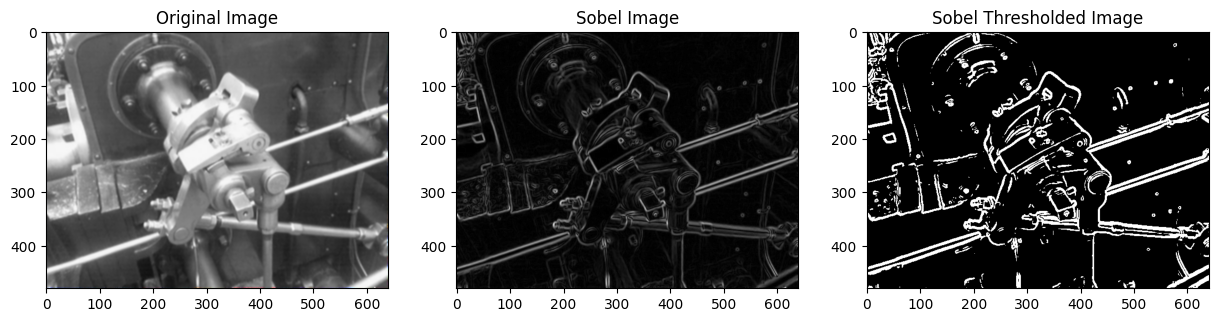

In [44]:
img = io.imread('/content/valve.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sobel = util.img_as_ubyte(filters.sobel(gray))

# Anda dapat bereksperimen dengan nilai lower and upper bound lain dari threshold
_, sobel_threshold = cv2.threshold(sobel, 15, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(15,7.5))
plt.subplot(131),plt.imshow(img)
plt.title('Original Image')
plt.subplot(132),plt.imshow(sobel, cmap='gray')
plt.title('Sobel Image')
plt.subplot(133),plt.imshow(sobel_threshold, cmap='gray')
plt.title('Sobel Thresholded Image')
plt.show()

# 1. b) Canny Edge Detection

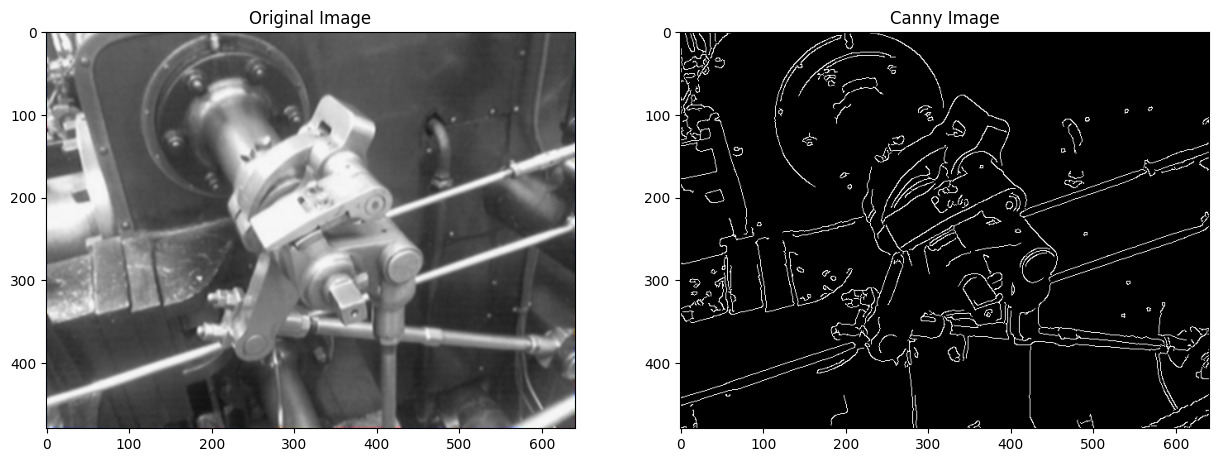

In [40]:
img = io.imread('/content/valve.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Anda dapat bereksperimen dengan nilai low dan high threshold lainnya, disarankan
# rasio antara low dan high threshold 1:2 atau 1:3.
canny = cv2.Canny(gray, 55, 165)

plt.figure(figsize=(15,7.5))
plt.subplot(121),plt.imshow(img)
plt.title('Original Image')
plt.subplot(122),plt.imshow(canny, cmap='gray')
plt.title('Canny Image')
plt.show()

# 2. Distribution-Based - Otsu

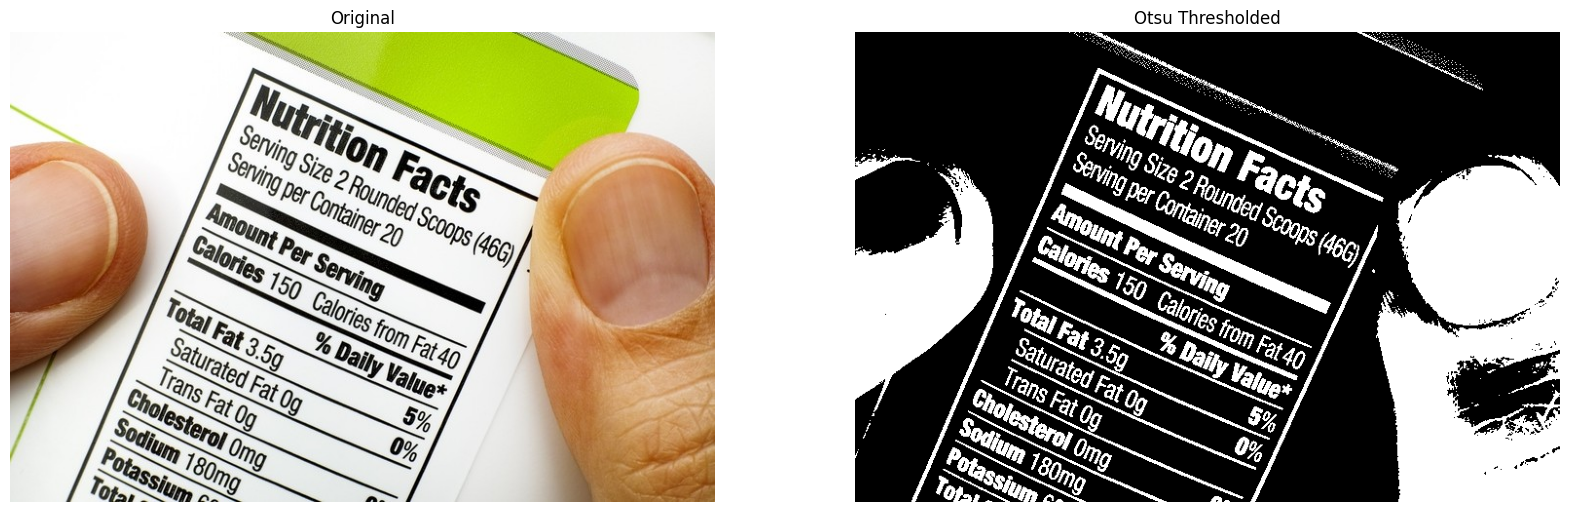

In [50]:
img_thresh = io.imread('ingredient.jpg')
G = util.img_as_ubyte(color.rgb2gray(img_thresh))
T = filters.threshold_otsu(G)
S = util.img_as_float(G > T)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.imshow(img_thresh)
plt.title('Original'); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(1-S, cmap='gray')
plt.title("Otsu Thresholded"); plt.axis("off")
plt.show()

# 3. Region-Based - SLIC

SLIC number of segments: 184


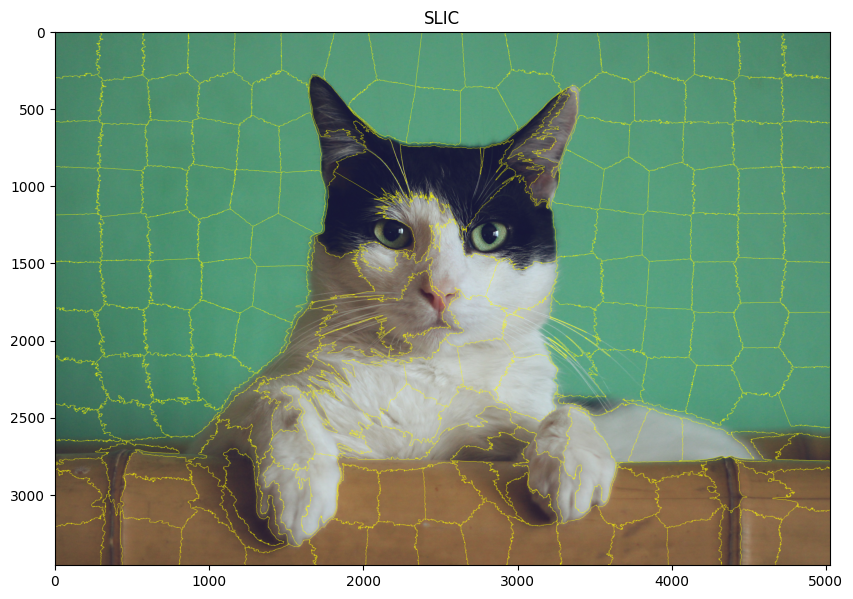

In [72]:
img2 = io.imread('cat.jpg')

segments_slic = slic(img2, n_segments=200)

print(f"SLIC number of segments: {len(np.unique(segments_slic))}")

plt.figure(figsize=(10,7))
plt.imshow(mark_boundaries(img2, segments_slic))
plt.title('SLIC')
plt.show()

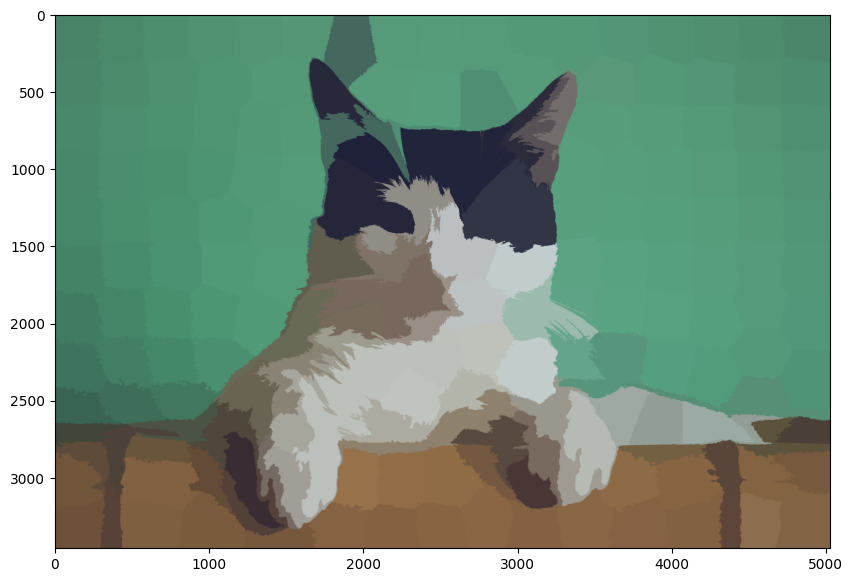

In [71]:
def superpixel_mean_image(image, slic_labels):
    """
        Code taken from https://stackoverflow.com/a/57746835
        Turn image into superpixel image, given SLIC segment labels.
    """
    im_rp = image.reshape((image.shape[0]*image.shape[1],image.shape[2]))
    sli_1d=np.reshape(slic_labels,-1)
    uni=np.unique(sli_1d)
    new_img=np.zeros(im_rp.shape)
    for i in uni:
        loc=np.where(sli_1d==i)[0]
        #print(loc)
        mm=np.mean(im_rp[loc,:],axis=0)
        new_img[loc,:]=mm
    return np.reshape(new_img,[image.shape[0],image.shape[1],image.shape[2]]).astype('uint8')

superpixel_image = superpixel_mean_image(img2, segments_slic)

plt.figure(figsize=(10,7))
plt.imshow(superpixel_image)
plt.show()